# 1. 贝叶斯推断
## 1.1 参数模型的三个步骤
  1. 设置包含参数的模型
  2. 设定评价参数的标准
  3. 确定获得最优评价的参数

其中第二步中设定参数的评价标准，之前遇到的方法有：
1. 定义误差函数并在误差值最小时确定参数
2. (**最优推断法**)得到训练集概率的似然函数，然后在似然函数最大时确定概率

本章提出了第三种方法，即**贝叶斯推断方法**，其独特之处在于对参数本身定义**取得各个参数值的概率**

**贝叶斯推断与最优推断法的不同之处在于：最优推断法给出的是具体的确定的参数值，贝叶斯推断给出的是参数的取值概率，如下图所示：**

![贝叶斯推断与最优推断法的不同之处](./data/learn_WML_chapter_8_difference.jpg "贝叶斯推断与最优推断法的不同之处")

## 1.2 基本的贝叶斯定理（Bayes）

我们知道条件概率公式：

$$P(X,Y)=P(X)P(Y|X)=P(Y)P(X|Y) \tag{1}$$

且有
$$P(X)=\sum_Y{P(X|Y)P(Y)} \tag{2}$$

则：

$$P(Y|X)==\frac{P(X|Y)P(Y)}{P(X)}=\frac{P(X|Y)P(Y)}{\sum_{Y'}{P(X|Y')P(Y')}} \tag{3}$$

# 2. 贝叶斯推断确定正态分布

# 2.1 推断参数
![bayes参数推断1](./data/learn_WML_chapter_8_bayes_参数推断1.jpg "bayes参数推断1")
![bayes参数推断2](./data/learn_WML_chapter_8_bayes_参数推断2.jpg "bayes参数推断2")

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm

In [32]:
mu_true=2.0
beta_true=1.0 # beta = 1 / ( sigma ^ 2 )
ds=np.random.normal(loc=mu_true,scale=1.0/beta_true,size=100)

In [33]:
# 贝叶斯推断参数值 mu
def bayes_mu(subplot,train_set):
    mu_0=-2.0
    beta_0=1.0
    
    # 后验分布
    n=len(train_set)
    mu_ML=np.mean(train_set)
    mu_N=(n*beta_true*mu_ML+beta_0*mu_0)/(n*beta_true+beta_0)
    beta_N=n*beta_true+beta_0
    
    # 画图表示
    subplot.set_title("N={}".format(n))
    linex=np.arange(-10,10.1,0.01)
    # 原始数据分布
    subplot.scatter(train_set,[0.2]*n,marker="o",color="blue")
    subplot.set_xlim(-5,5)
    # subplot.set_ylim(0,5)
    
    # bayes推断结果
    sigma=1.0/beta_N
    mu_est=norm(loc=mu_N,scale=np.sqrt(sigma))
    subplot.plot(linex,mu_est.pdf(linex),color="red",label="mu_N={:.2f}\nsigma={:.2f}".format(mu_N,sigma))
    subplot.legend()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


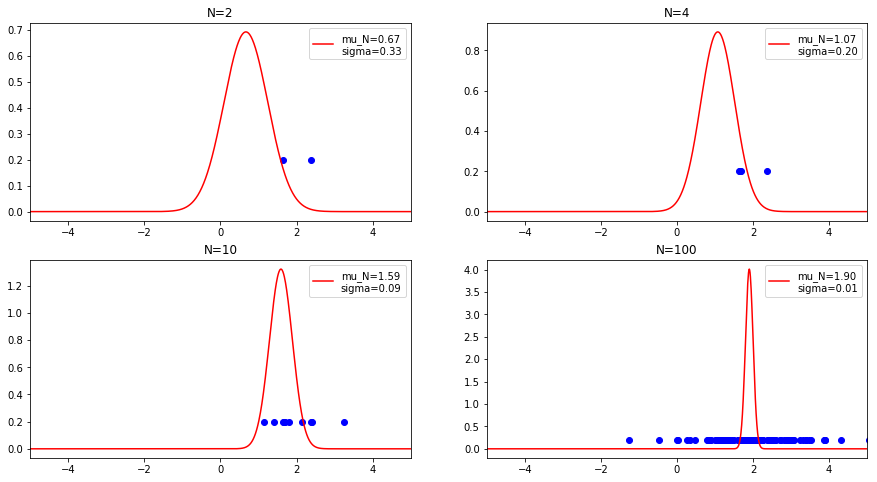

In [34]:
fig=plt.figure(figsize=(15,8))
for i,n in enumerate([2,4,10,100]):
    subplot=fig.add_subplot(2,2,i+1)
    bayes_mu(subplot,train_set=ds[:n])
fig.show()

# 2.2 推断观测值
![观测值推断1](./data/learn_WML_chapter_8_bayes_观测值推断1.jpg "观测值推断1")
![观测值推断2](./data/learn_WML_chapter_8_bayes_观测值推断2.jpg "观测值推断2")

In [45]:
# bayes 推断后续观测值
def estimate_pdf(subplot,train_set):
    mu_0=-2.0
    beta_0=1.0
    
    # 后验分布
    n=len(train_set)
    mu_ML=np.mean(train_set)
    mu_N=(n*beta_true*mu_ML+beta_0*mu_0)/(n*beta_true+beta_0)
    beta_N=n*beta_true+beta_0
    
    # 画图表示
    subplot.set_title("N={}".format(n))
    linex=np.arange(-10,10.1,0.01)
    # 原始数据分布
    original=norm(loc=mu_true,scale=np.sqrt(1.0/beta_true))
    subplot.plot(linex,original.pdf(linex),color="green",linestyle="--",label="True_distribution")
    subplot.scatter(train_set,original.pdf(train_set),marker="o",color="blue")
    # bayes推断结果
    sigma=1.0/beta_N+1.0/beta_true
    mu_est=norm(loc=mu_N,scale=np.sqrt(sigma))
    subplot.plot(linex,mu_est.pdf(linex),color="red",label="Estimated_distribution\nmu_N={:.2f}\nsigma={:.2f}".format(mu_N,sigma))
    subplot.legend()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


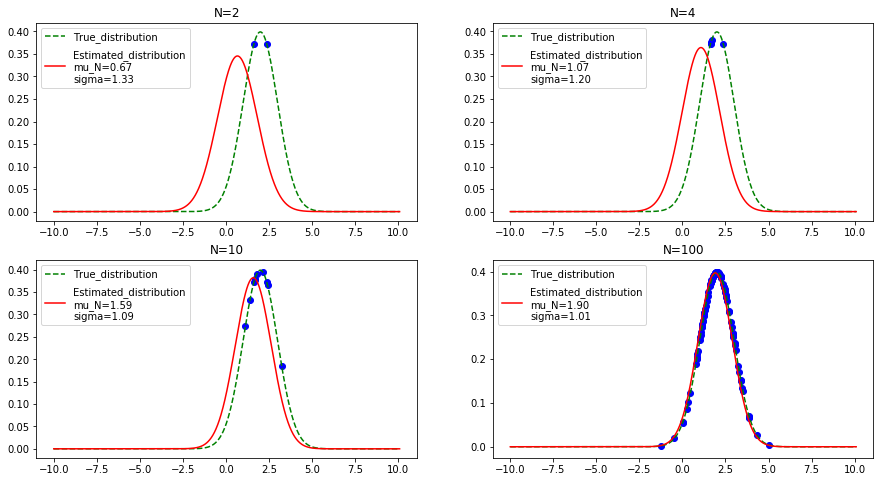

In [47]:
fig=plt.figure(figsize=(15,8))
for i,n in enumerate([2,4,10,100]):
    subplot=fig.add_subplot(2,2,i+1)
    estimate_pdf(subplot,train_set=ds[:n])
fig.show()

**从上图的结果可以看到，随着原始观测数据集N（绿点）的增大，下一个观测值的预测结果（红实线）与真实的数据来源（蓝虚线）重合度越来越高，基本接近了真实数据**

# 3. 贝叶斯推断在回归分析中的应用
![bayes regression](./data/learn_WML_chapter_8_bayes_regression.jpg "bayes regression")

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [94]:
def create_dataset(num):
    dataset=pd.DataFrame(columns=["x","y"])
    for i in range(num):
        x=float(i)/float(num-1)
        y=np.sin(2*np.pi*x)+np.random.normal(loc=0,scale=0.3)
        dataset=dataset.append(pd.Series([x,y],index=["x","y"]),ignore_index=True)
    return dataset

In [95]:
train_set=create_dataset(4)
train_set

,x,y
0,0.000000,-0.096749
1,0.333333,0.950499
2,0.666667,-0.723446
3,1.000000,0.128208


In [96]:
def resolve(dataset, m):
    beta = 1.0/(0.3)**2
    alpha = 1.0/100**2  
    t = dataset.y
    phis = pd.DataFrame()
    for i in range(0,m+1):
        p = dataset.x**i
        p.name="x**%d" % i
        phis = pd.concat([phis,p], axis=1)

    for index, line in phis.iterrows():
        phi = pd.DataFrame(line)
        if index == 0:
            phiphi = np.dot(phi,phi.T)
        else:
            phiphi += np.dot(phi,phi.T)
    s_inv = alpha * pd.DataFrame(np.identity(m+1)) + beta * phiphi
    s = np.linalg.inv(s_inv)
    
    def mean_func(x0):
        phi_x0 = pd.DataFrame([x0 ** i for i in range(0,m+1)])
        for index, line in phis.iterrows():
            if index == 0:
                tmp = t[index] * line
            else:
                tmp += t[index] * line
        return (beta * np.dot(np.dot(phi_x0.T, s), pd.DataFrame(tmp))).flatten()
    def deviation_func(x0):
        phi_x0 = pd.DataFrame([x0 ** i for i in range(0,m+1)])
        deviation = np.sqrt(1.0/beta + np.dot(np.dot(phi_x0.T, s), phi_x0))
        return deviation.diagonal()
    for index, line in phis.iterrows():
        if index == 0:
            tmp = t[index] * line
        else:
            tmp += t[index] * line
    mean = beta * np.dot(s, pd.DataFrame(tmp)).flatten() # 係数 w の事後分布の平均

    return mean_func, deviation_func, mean, s
        

In [97]:
def show_estimation(subplot, train_set, order):
    mean_fun, deviation_fun, mean, sigma = resolve(train_set, order)
    num = len(train_set)

    subplot.set_xlim(-0.05,1.05)
    subplot.set_ylim(-2,2)
    subplot.set_title("N=%d" % num)

    # 原始数据点
    subplot.scatter(train_set.x, train_set.y, marker='o', color='blue',label=None)
    
    linex = np.arange(0,1.01,0.01)
    #真实曲线
    liney = np.sin(2*np.pi*linex)
    subplot.plot(linex, liney, color='green',linestyle=':')
    # 偏差
    m = np.array(mean_fun(linex))
    d = np.array(deviation_fun(linex))
    subplot.plot(linex, m, color='red', label='mean')
    subplot.legend(loc=1)
    subplot.plot(linex, m-d, color='black', linestyle='--')
    subplot.plot(linex, m+d, color='black', linestyle='--')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in sqrt
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


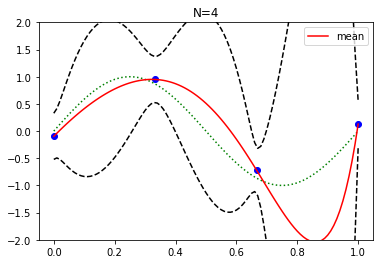

In [98]:
fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
show_estimation(subplot, train_set, 9)
fig.show()

In [99]:
def show_samples(subplot, train_set, order):
    mean_fun, deviation_fun, mean, sigma = resolve(train_set, order)
    num = len(train_set)
    ws_samples = pd.DataFrame(np.random.multivariate_normal(mean,sigma,4))

    subplot.set_xlim(-0.05,1.05)
    subplot.set_ylim(-2,2)
    subplot.set_title("N=%d" % num)

    # 原始数据点
    subplot.scatter(train_set.x, train_set.y, marker='o', color='blue',label=None)

    linex = np.arange(0,1.01,0.01)
    # 真实曲线
    liney = np.sin(2*np.pi*linex)
    subplot.plot(linex, liney, color='green',linestyle=':')
    # 多项式拟合
    m = np.array(mean_fun(linex))
    d = np.array(deviation_fun(linex))
    liney = m
    subplot.plot(linex, liney, color='red', label="mean")
    subplot.legend(loc=1)
    def f(x, ws):
        y = 0
        for i, w in enumerate(ws):
            y += w * (x ** i)
        return y
    for index, ws in ws_samples.iterrows():
        liney = f(linex, ws)
        subplot.plot(linex, liney, color='red', linestyle='--')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in sqrt
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


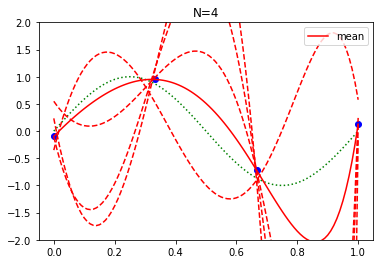

In [100]:
fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
show_samples(subplot, train_set, 9)
fig.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in sqrt
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


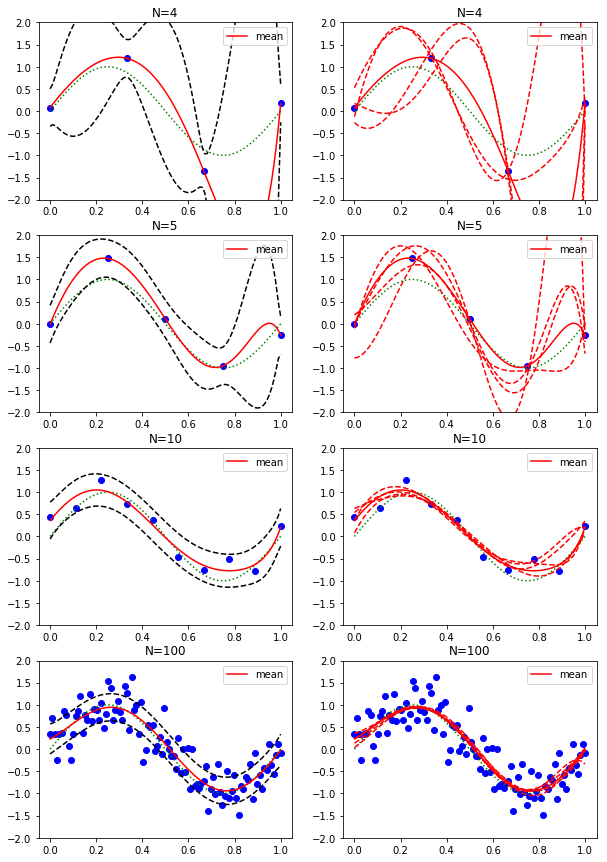

In [103]:
fig = plt.figure(figsize=(10,15))
i = 1
for num in [4,5,10,100]:
    train_set = create_dataset(num)
    subplot1 = fig.add_subplot(4,2,i)
    subplot2 = fig.add_subplot(4,2,i+1)
    show_estimation(subplot1, train_set, 9)
    show_samples(subplot2, train_set, 9)
    i += 2
fig.show()